## Import necessary libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

<div style="border-radius:10px; padding: 15px; background-color: #FF6347; font-size:110%; text-align:left;color:black">
    
2. Find and plot the lines in the image (a.jpg), for edges with intensity more than 150. and
Votes more than 200, show the line with thickness = 2, and with the color pure green!
(Lower threshold for canny = 100, Other parameters = Desired)

In [2]:
def show_multi_img (rows,columns,img_names,titles = None,vmin = 0,vmax = 255):
    fig = plt.figure(figsize=(15,17),dpi=100)
    for i in range(len(img_names)):
        fig.add_subplot(rows,columns,i+1)
        plt.imshow(img_names[i],cmap='gray',vmin=vmin,vmax=vmax)
        plt.axis('off')
        if titles is not None:
            plt.title(str(i+1) + '. ' + titles[i])
    plt.show()

In [3]:
def show_img_plt(img, c_map ='gray', fig_hight=8, fig_width=6, vmin=0, vmax=255):
    plt.figure(figsize=(fig_hight, fig_width), dpi=100)
    plt.imshow(img, cmap=c_map, vmin=vmin, vmax=vmax)

In [4]:
#read Image
img = cv2.imread(r'E:\TA Filoger\Exercise\DIP\DIP20\EX_20_DIP\media\a.jpg',-1)

In [5]:
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [6]:
edges = cv2.Canny(gray_img,100,150,3)

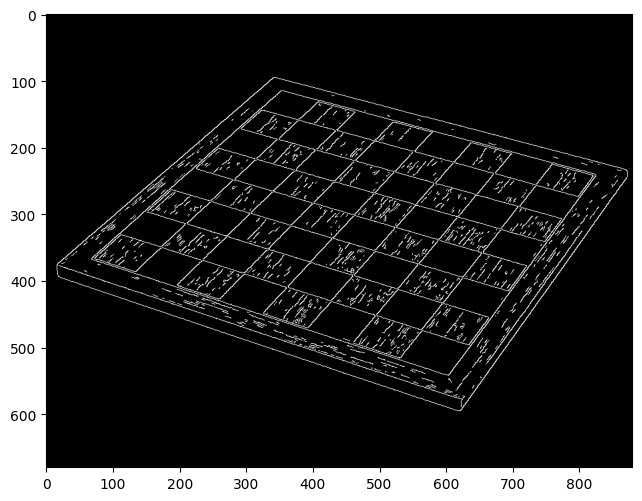

In [7]:
show_img_plt(edges)

In [8]:
lines = cv2.HoughLines(edges,1,np.pi/180,200)

In [9]:
lines

array([[[3.2900000e+02, 1.8849555e+00]],

       [[1.2200000e+02, 1.8500490e+00]],

       [[1.9000000e+01, 1.8325957e+00]],

       [[5.4300000e+02, 7.5049156e-01]],

       [[1.9600000e+02, 1.8675023e+00]],

       [[2.9500000e+02, 8.5521132e-01]],

       [[2.4000000e+02, 1.8675023e+00]],

       [[4.2700000e+02, 8.0285144e-01]],

       [[6.6900000e+02, 6.9813168e-01]],

       [[3.7300000e+02, 8.2030475e-01]],

       [[7.3600000e+02, 6.6322511e-01]],

       [[6.0500000e+02, 7.1558499e-01]],

       [[8.0800000e+02, 6.2831855e-01]],

       [[2.1000000e+01, 1.8325957e+00]],

       [[4.8400000e+02, 7.8539819e-01]],

       [[8.5200000e+02, 6.1086524e-01]],

       [[5.6000000e+01, 1.8325957e+00]],

       [[2.7700000e+02, 1.8849555e+00]]], dtype=float32)

In [10]:
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a *rho
    y0 = b *rho
    # (r *cos(theta) + 1000 sin(theta))
    x1 = int(x0+1000 *(-b))

    y1 = int(y0 +1000 *(a))

    x2 = int(x0 -1000 *(-b))

    y2 = int(y0 - 1000 *(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),3)

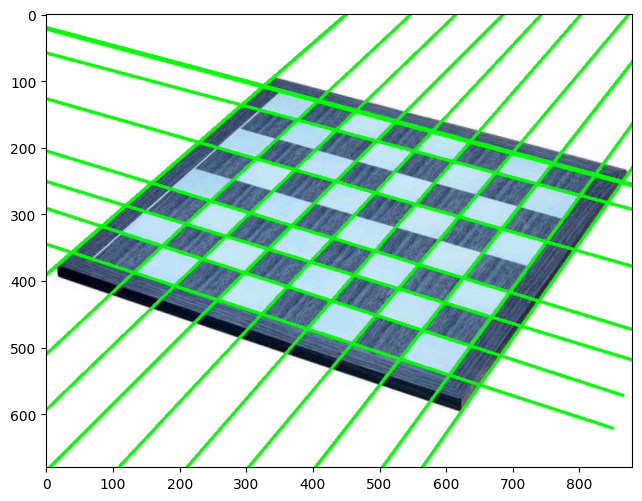

In [11]:
show_img_plt(img)

<div style="border-radius:10px; padding: 15px; background-color: #FF6347; font-size:110%; text-align:left;color:black">
    
3. Find and plot the Circles in the image (b.jpg), for pixels with intensity greater than 120

In [12]:
img = cv2.imread(r'E:\TA Filoger\Exercise\DIP\DIP20\EX_20_DIP\media\b.jpg',0)

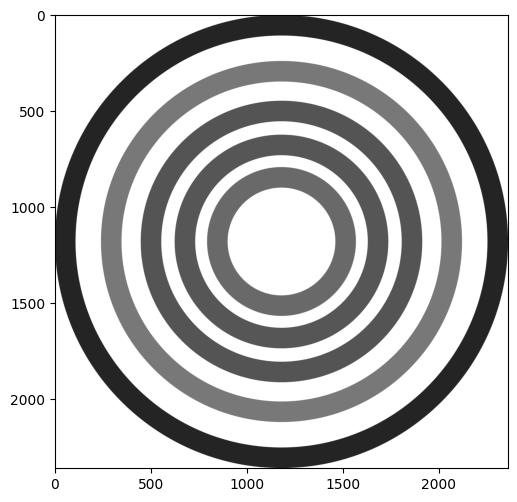

In [13]:
show_img_plt(img)

In [15]:
# Contour
ret,thresh = cv2.threshold(img,150,255,cv2.THRESH_BINARY)

In [16]:
contours,hireachy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


Number of Contours = 


In [17]:
print('Number of Contours ={}'.format(len(contours)))

Number of Contours =13


In [18]:
img2 = cv2.imread(r'E:\TA Filoger\Exercise\DIP\DIP20\EX_20_DIP\media\b.jpg',1)

In [19]:
img3 = cv2.drawContours(img2,contours,-1,(0,255,0),10)

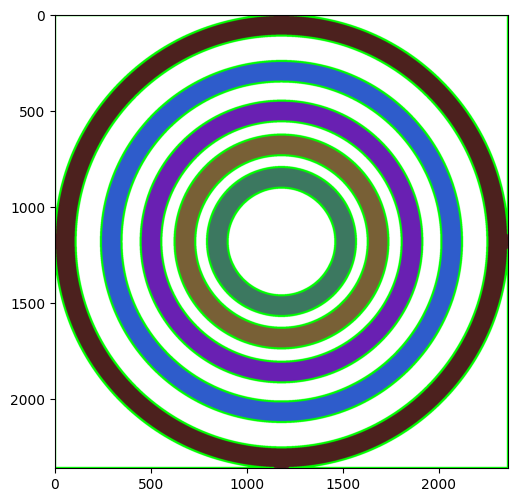

In [20]:
show_img_plt(img3)

<div style="border-radius:10px; padding: 15px; background-color: #FF6347; font-size:110%; text-align:left;color:black">
    
4. Split the 8th frame of the video (lane.mp4) and Denoise that, then find the edges, and
finally show the edges on the original frame!
(denoising and edge detection method are desired!)

In [21]:
#read Video file
capture = cv2.VideoCapture(r'E:\TA Filoger\Exercise\DIP\DIP20\EX_20_DIP\media\lane.mp4')

In [22]:
frame_number = 8

In [23]:
while frame_number >0:
    success,frame = capture.read()
    if not success:
        break
    frame_number -=1

In [24]:
frame.shape

(720, 1280, 3)

In [25]:
capture.set(cv2.CAP_PROP_POS_FRAMES,frame_number)

True

In [26]:
frame_8_rgb = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
frame_8_rgb_copy = frame_8_rgb.copy()

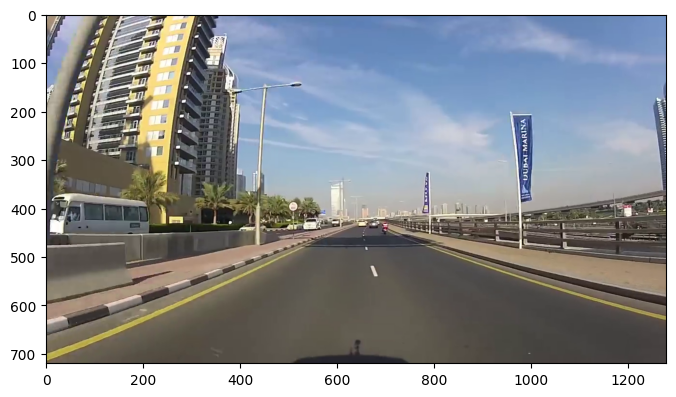

In [27]:
show_img_plt(frame_8_rgb_copy)

In [28]:
#denosing

denoise_frame = cv2.GaussianBlur(frame_8_rgb_copy,(5,5),0)

In [29]:
#Edge detection
edge_denoise_frame = cv2.Canny(denoise_frame,100,200)

In [31]:
result = cv2.bitwise_and(frame_8_rgb_copy,frame_8_rgb_copy,mask = edge_denoise_frame)

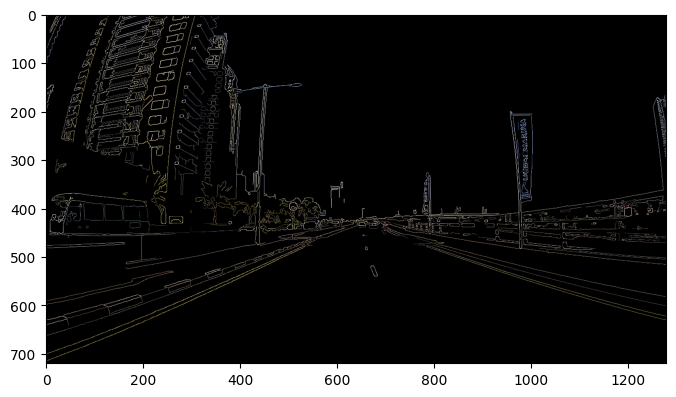

In [32]:
show_img_plt(result)

In [33]:
outPut = np.copy(frame_8_rgb_copy)

In [34]:
outPut[edge_denoise_frame !=0] = [0,255,0]

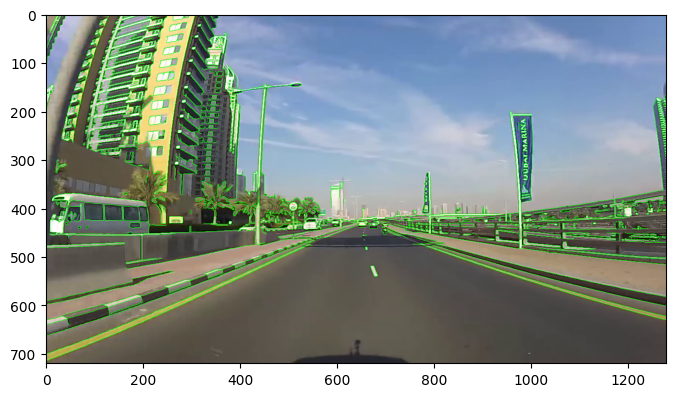

In [35]:
show_img_plt(outPut)